In [2]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

# Add project root to path
sys.path.append(os.path.abspath('..'))

from src.data_loader import DataLoader
from src.validators.static_data import StaticDataValidator

%matplotlib inline

## 1. Load Data
We load the portfolio data from the CSV file.

In [3]:
data_path = '../data/Test.csv'
loader = DataLoader(data_path)
positions, trades = loader.load_data()

print(f"Loaded {len(positions)} positions and {len(trades)} trades.")

Loaded 7721 positions and 468 trades.


## 2. Static Data Validation
We check for tickers where static fields (Currency, Sector, etc.) change over time.

In [4]:
validator = StaticDataValidator(positions, trades)
errors = validator.validate()

print(f"Found {len(errors)} static data errors.")

# Convert errors to DataFrame for display
if errors:
    error_df = pd.DataFrame([vars(e) for e in errors])

    # Show distribution of severity
    print("Severity Distribution:")
    print(error_df["severity"].value_counts())
    
    cols = ['date', 'ticker', 'error_type', 'severity', 'description']
    display(error_df[cols])
else:
    print("No static data errors found.")

Found 169 static data errors.
Severity Distribution:
severity
Medium    169
Name: count, dtype: int64


,date,ticker,error_type,severity,description
0,2022-11-09,0486.HK,Static Data Inconsistency,Medium,Static field 'Industry' changed. Found 'No GIC...
1,2022-11-10,0486.HK,Static Data Inconsistency,Medium,Static field 'Industry' changed. Found 'No GIC...
2,2022-11-24,0486.HK,Static Data Inconsistency,Medium,Static field 'Industry' changed. Found 'No GIC...
3,2022-12-07,0486.HK,Static Data Inconsistency,Medium,Static field 'Industry' changed. Found 'No GIC...
4,2022-12-08,0486.HK,Static Data Inconsistency,Medium,Static field 'Industry' changed. Found 'No GIC...
...,...,...,...,...,...
164,2022-12-06,VNA,Static Data Inconsistency,Medium,Static field 'Industry' changed. Found 'No GIC...
165,2022-12-07,VNA,Static Data Inconsistency,Medium,Static field 'Industry' changed. Found 'No GIC...
166,2022-12-15,VNA,Static Data Inconsistency,Medium,Static field 'Industry' changed. Found 'No GIC...
167,2022-11-01,WIX,Static Data Inconsistency,Medium,Static field 'Industry' changed. Found 'No GIC...


## 3. Analysis
Let's see which tickers have the most unstable data.

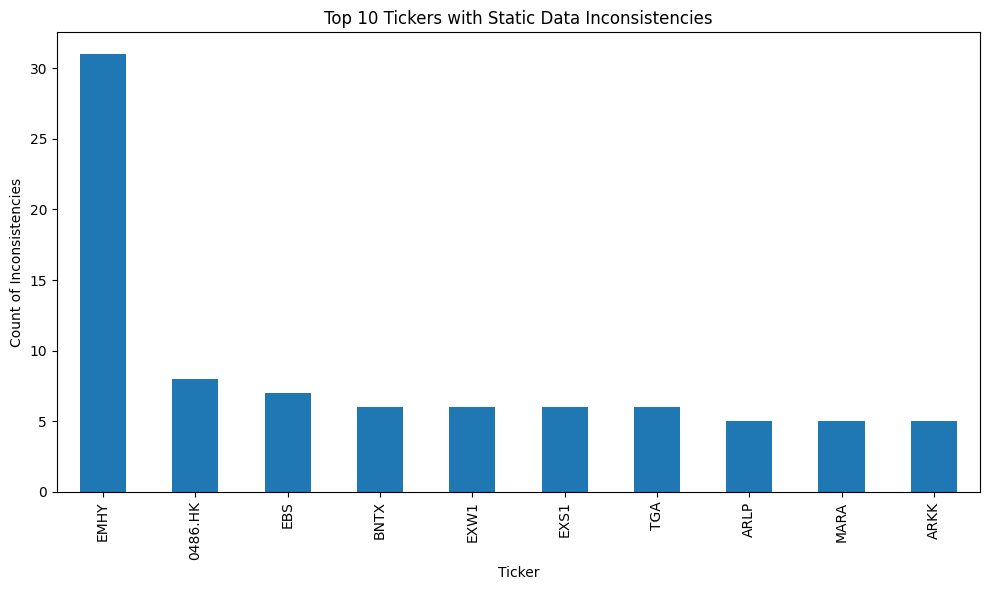


Unique Error Descriptions:
- Static field 'Industry' changed. Found 'No GIC - Other', expected consensus 'Metals & Mining'.
- Static field 'Industry' changed. Found 'No GIC - Other', expected consensus 'Technology Hardware, Storage &'.
- Static field 'Industry' changed. Found 'No GIC - Other', expected consensus 'Oil, Gas & Consumable Fuels'.
- Static field 'Country' changed. Found 'Global', expected consensus 'US'.
- Static field 'Industry' changed. Found 'No GIC - Other', expected consensus 'Energy Equipment & Services'.
- Static field 'Industry' changed. Found 'No GIC - Other', expected consensus 'Biotechnology'.
- Static field 'Industry' changed. Found 'No GIC - Other', expected consensus 'Hotels, Restaurants & Leisure'.
- Static field 'Industry' changed. Found 'No GIC - Other', expected consensus 'Beverages'.
- Static field 'Industry' changed. Found 'No GIC - Other', expected consensus 'Specialty Retail'.
- Static field 'Country' changed. Found 'US', expected consensus 'AT'.
- St

In [5]:
if errors:
    # Count errors per ticker
    ticker_counts = error_df['ticker'].value_counts().head(10)
    
    plt.figure(figsize=(10, 6))
    ticker_counts.plot(kind='bar')
    plt.title('Top 10 Tickers with Static Data Inconsistencies')
    plt.ylabel('Count of Inconsistencies')
    plt.xlabel('Ticker')
    plt.tight_layout()
    plt.show()
    
    # Show unique descriptions to see what kind of fields are changing
    print("\nUnique Error Descriptions:")
    for desc in error_df['description'].unique():
        print(f"- {desc}")